In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go


<script type="text/javascript">
 window.PlotlyConfig = {MathJaxConfig: 'local'};
 if (window.MathJax) {MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}
 if (typeof require !== 'undefined') {
 require.undef("plotly");
 requirejs.config({
 paths: {
 'plotly': ['https://cdn.plot.ly/plotly-latest.min']
 }
 });
 require(['plotly'], function(Plotly) {
 window._Plotly = Plotly;
 });
 }
 </script>

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
A = data[data.target == 1]
B = data[data.target == 0]

In [4]:
data.shape

(303, 14)

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


1    165
0    138
Name: target, dtype: int64
Percentuálne, bez srdcových ochorení: 45.54
Percentuálne, so srdcovými ochoreniami: 54.46


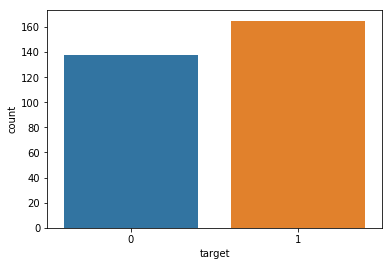

In [10]:
targetPom = data.target.value_counts()
print(targetPom)
print("Percentuálne, bez srdcových ochorení: "+str(round(targetPom[0]*100/303,2)))
print("Percentuálne, so srdcovými ochoreniami: "+str(round(targetPom[1]*100/303,2)))
y = data["target"]

sns.countplot(y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



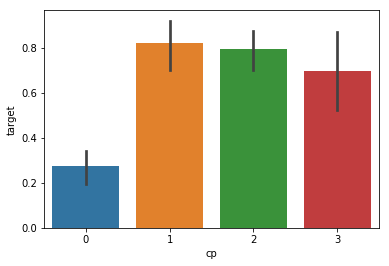

In [11]:
sns.barplot(data["cp"],y)

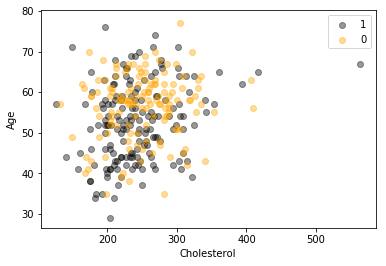

In [12]:
plt.scatter(A.chol,A.age,color = "Black",label="1",alpha=0.4)
plt.scatter(B.chol,B.age,color = "Orange",label="0",alpha=0.4)
plt.xlabel("Cholesterol")
plt.ylabel("Age")
plt.legend()
plt.show()

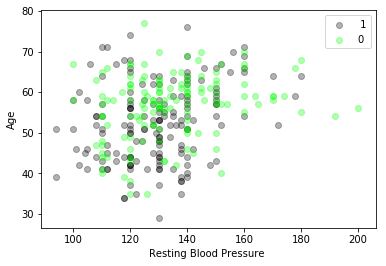

In [13]:
plt.scatter(A.trestbps,A.age,color = "Black",label=" 1",alpha=0.3)
plt.scatter(B.trestbps,B.age,color = "Lime",label="0",alpha=0.3)
plt.xlabel("Resting Blood Pressure ")
plt.ylabel("Age")
plt.legend()
plt.show()

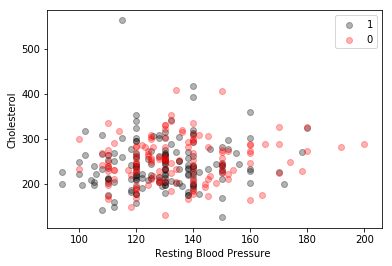

In [14]:
plt.scatter(A.trestbps,A.chol,color = "Black",label="1",alpha=0.3)
plt.scatter(B.trestbps,B.chol,color = "red",label="0",alpha=0.3)
plt.xlabel("Resting Blood Pressure ")
plt.ylabel("Cholesterol")
plt.legend()
plt.show()

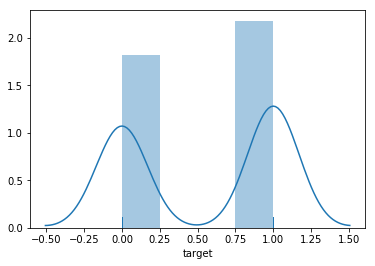

In [15]:
sns.distplot(data['target'],rug=True)
plt.show()

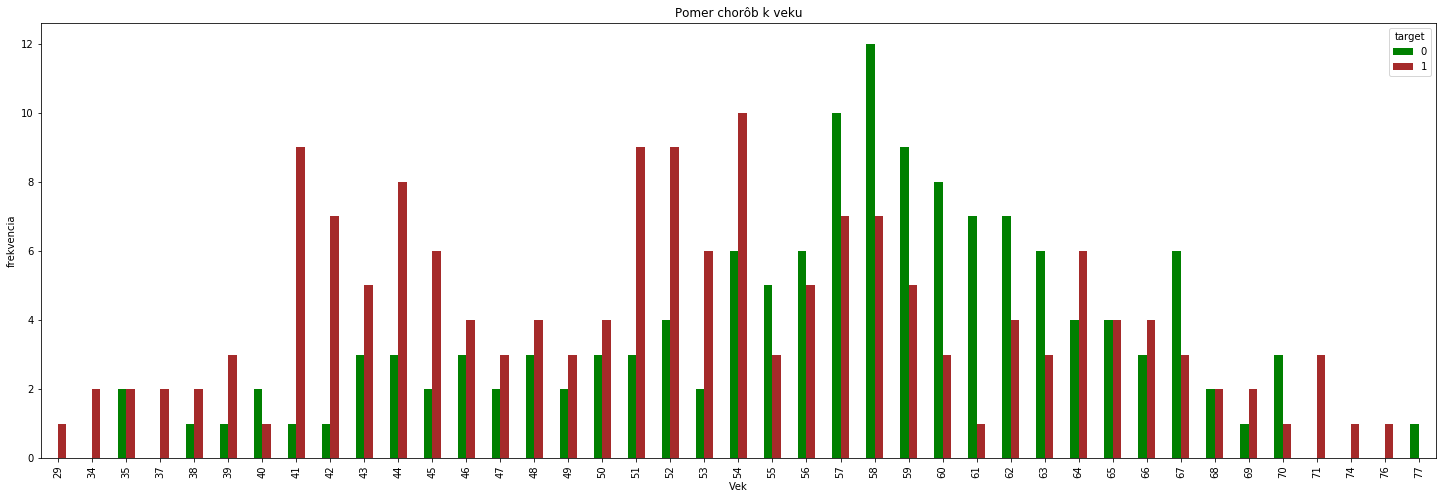

In [16]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(25,8),color=['green','brown' ])
plt.title('Pomer chorôb k veku')
plt.xlabel('Vek')
plt.ylabel('frekvencia')
plt.show()

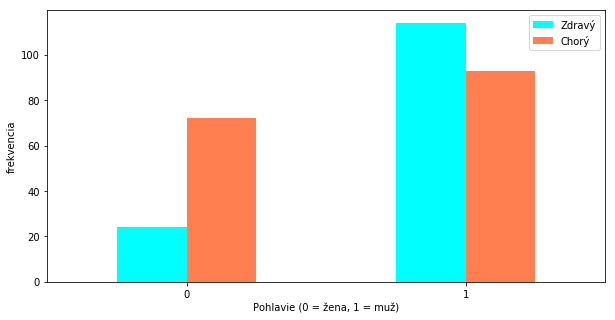

In [17]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(10,5),color=['cyan','coral' ])
plt.xlabel('Pohlavie (0 = žena, 1 = muž)')
plt.xticks(rotation=0)
plt.legend(["Zdravý", "Chorý"])
plt.ylabel('frekvencia')
plt.show()

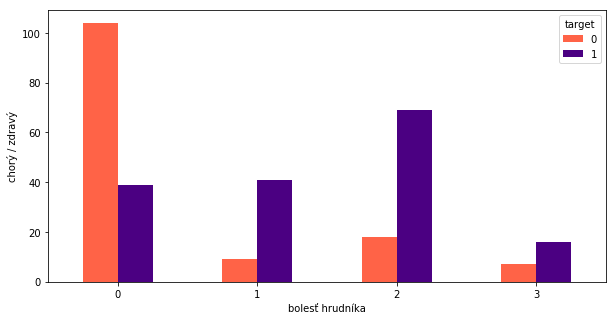

In [18]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('bolesť hrudníka')
plt.xticks(rotation = 0)
plt.ylabel('chorý / zdravý')
plt.show()

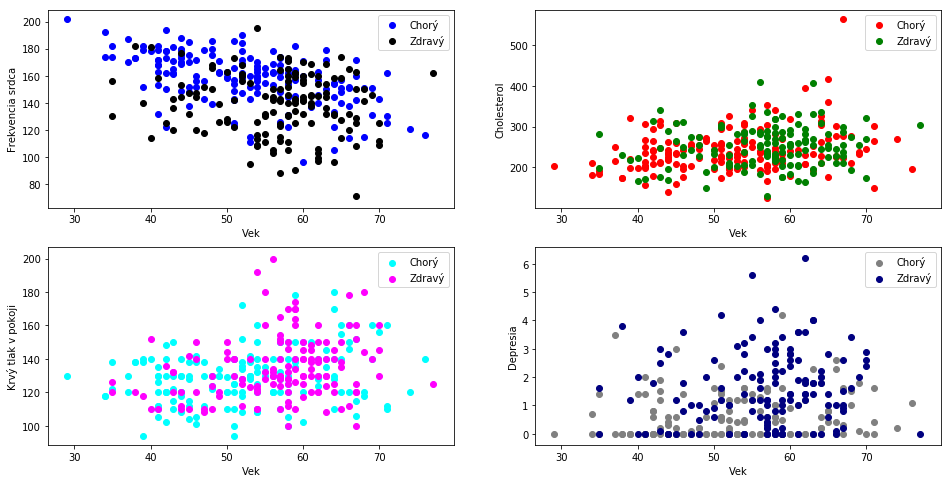

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x=data.age[data.target==1],y=data.thalach[data.target==1],c='blue')
plt.scatter(x=data.age[data.target==0],y=data.thalach[data.target==0],c='black')
plt.xlabel('Vek')
plt.ylabel('Frekvencia srdca')
plt.legend(['Chorý','Zdravý'])

plt.subplot(2,2,2)
plt.scatter(x=data.age[data.target==1],y=data.chol[data.target==1],c='red')
plt.scatter(x=data.age[data.target==0],y=data.chol[data.target==0],c='green')
plt.xlabel('Vek')
plt.ylabel('Cholesterol')
plt.legend(['Chorý','Zdravý'])

plt.subplot(2,2,3)
plt.scatter(x=data.age[data.target==1],y=data.trestbps[data.target==1],c='cyan')
plt.scatter(x=data.age[data.target==0],y=data.trestbps[data.target==0],c='fuchsia')
plt.xlabel('Vek')
plt.ylabel('Krvý tlak v pokoji')
plt.legend(['Chorý','Zdravý'])

plt.subplot(2,2,4)
plt.scatter(x=data.age[data.target==1],y=data.oldpeak[data.target==1],c='grey')
plt.scatter(x=data.age[data.target==0],y=data.oldpeak[data.target==0],c='navy')
plt.xlabel('Vek')
plt.ylabel('Depresia')
plt.legend(['Chorý','Zdravý'])
plt.show()


In [20]:
df = data

In [21]:
chest_pain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chest_pain],axis=1)
df.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
frames=[df,sp,th]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal'],axis=1,inplace=True)

In [22]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,1,0


In [23]:
df.shape

(303, 21)

In [24]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [25]:
X = df.drop(['target'], axis = 1)
y = df.target.values

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



In [28]:
X_train.shape

(203, 20)

In [29]:
X_test.shape

(100, 20)

In [30]:
Y_train.shape

(203,)

In [31]:
Y_test.shape

(100,)

In [32]:
Y_test

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [33]:
model = Sequential()
model.add(Dense(20,activation='relu',input_dim = 20))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [34]:
history = model.fit(X_train,Y_train,epochs= 300, validation_split=0.33, batch_size= 10)

Train on 136 samples, validate on 67 samples
Epoch 1/300
136/136 [==============================] - 1s 10ms/step - loss: 0.7216 - accuracy: 0.5882 - val_loss: 0.7853 - val_accuracy: 0.4925
Epoch 2/300
136/136 [==============================] - 0s 841us/step - loss: 0.6871 - accuracy: 0.5882 - val_loss: 0.7386 - val_accuracy: 0.4925
Epoch 3/300
136/136 [==============================] - 0s 701us/step - loss: 0.6583 - accuracy: 0.5882 - val_loss: 0.7085 - val_accuracy: 0.4925
Epoch 4/300
136/136 [==============================] - 0s 768us/step - loss: 0.6348 - accuracy: 0.5882 - val_loss: 0.6820 - val_accuracy: 0.4925
Epoch 5/300
136/136 [==============================] - 0s 698us/step - loss: 0.6137 - accuracy: 0.6103 - val_loss: 0.6562 - val_accuracy: 0.5373
Epoch 6/300
136/136 [==============================] - 0s 879us/step - loss: 0.5908 - accuracy: 0.6544 - val_loss: 0.6315 - val_accuracy: 0.5821
Epoch 7/300
136/136 [==============================] - 0s 639us/step - loss: 0.5699 - 

In [35]:
scores = model.evaluate(X_train, Y_train)

203/203 [==============================] - 0s 1ms/step


In [36]:
print("\nPresnosť siete: %.2f%%" % (scores[1]*100))


Presnosť siete: 94.09%


In [37]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [38]:
presnost = np.average(history.history['accuracy'])
presnost = round(presnost, 3)

In [39]:
print("\npriemerná presnosť siete: %.2f%%" % (presnost*100))


priemerná presnosť siete: 95.60%


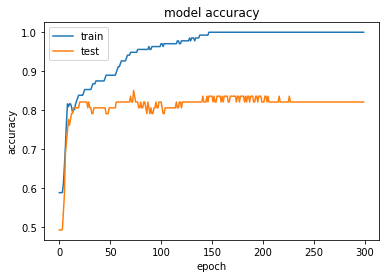

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

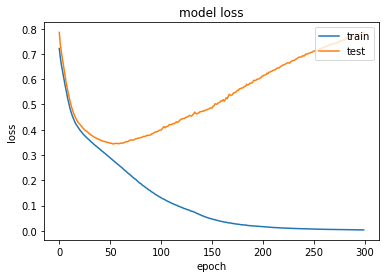

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [42]:
for layer in model.layers: print(layer.get_config(), layer.get_weights())

{'name': 'dense_1', 'trainable': True, 'batch_input_shape': (None, 20), 'dtype': 'float32', 'units': 20, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 1.36911888e-02, -2.33755320e-01, -3.71469140e-01,
        -1.39557362e-01, -7.12171376e-01, -4.07274783e-01,
         6.42698305e-03,  7.80007243e-02, -2.74725169e-01,
        -2.17960119e-01, -3.54505479e-01, -2.78625220e-01,
        -1.27030969e-01, -7.48992264e-01, -3.11818928e-01,
        -8.47043246e-02,  1.73770767e-02,  1.60095483e-01,
        -1.98097244e-01, -9.55753103e-02],
       [-3.34041029e-01, -2.15587556e-01,  4.72288579e-01,
        -1.79862842e-01, -5.58101714e-01, -8.84872079e-02,
 

In [43]:
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
second_layer_weights = model.layers[1].get_weights()[0]
second_layer_biases  = model.layers[1].get_weights()[1]

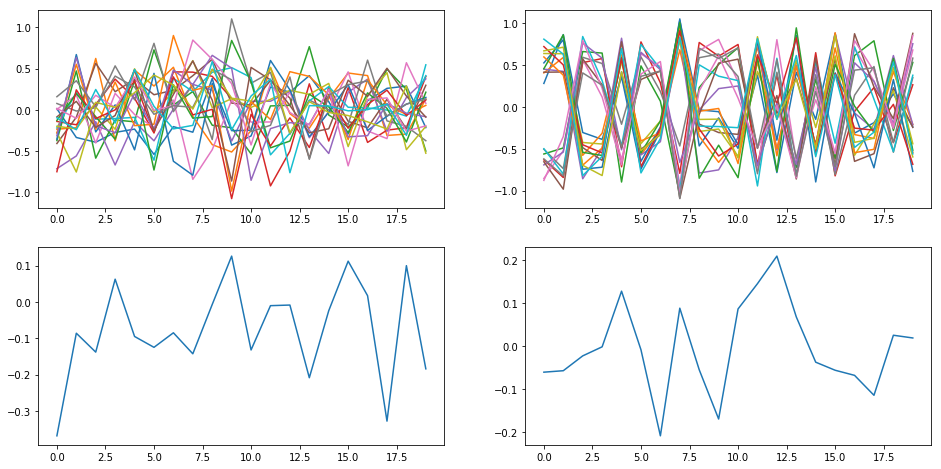

In [44]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(first_layer_weights, label = '1. odhad')

plt.subplot(2,2,2)
plt.plot(second_layer_weights, label = '2. odhad')

plt.subplot(2,2,3)
plt.plot(first_layer_biases, label = '1. odhad')

plt.subplot(2,2,4)
plt.plot(second_layer_biases, label = '2. odhad')
plt.show()
